In [1]:
import math
from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt

In [2]:
bounds = [(0.01, 10), (0.01, 10), (0.01, 10), (0.01, 10),(0.01, 10), 
          (0.01, 10), (0.01, 10), (0.01, 10), 
          (0.01, 10), (0.01, 10), (0.01, 10), (0.01, 10),(0.01, 10),
          (0.01, 10), (0.01, 10), (0.01, 10), 
          (0.01, 10), (0.01, 10), (0.01, 10), (0.01, 10)]
x_opt = [3.16246061572185, 3.12833142812967, 3.09479212988791, 3.06145059523469, 3.02792915885555, 2.99382606701730,
         2.95866871765285, 2.92184227312450, 0.49482511456933, 0.48835711005490, 0.48231642711865, 0.47664475092742,
         0.47129550835493, 0.46623099264167, 0.46142004984199, 0.45683664767217, 0.45245876903267, 0.44826762241853,
         0.44424700958760, 0.44038285956317]
y_opt = -0.80361910412559


def G02(X):
    n = 20
    up_left, down = 0.0, 0.0
    up_right = 1
    for i in range(n):
        up_left += (math.cos(X[i])) ** 4
        up_right *= (math.cos(X[i])) ** 2
        down += (i + 1) * X[i] * X[i]
    y = -abs((up_left - 2 * up_right) / math.sqrt(down))
    x_mul = 1
    x_sum = 0.0
    for i in range(n):
        x_mul *= X[i]
        x_sum += X[i]
    g1 = 0.75 - x_mul
    g2 = x_sum - 7.5 * n

    return y, g1, g2

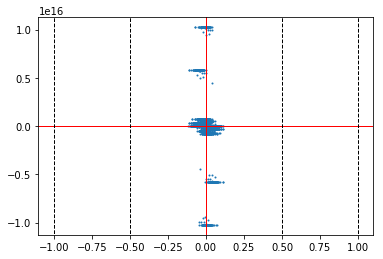

In [19]:
pN = 100
dim = 20
keth = 0.5
eta = 0.5
X = np.zeros((pN, dim))
fmax = 1
vmax = 5
for i in range(pN):
    for j in range(dim):
        X[i][j] = bounds[j][0]+(bounds[j][1]-bounds[j][0])*np.random.random()

fs = []    
Vs = []
for i in range(pN):
    for j in range(pN):
        if i != j:
            deltaf = G02(X[i])[0] - G02(X[j])[0]
            delraV = np.sum(G02(X[i])[1:3])-np.sum(G02(X[j])[1:3])
            fs.append(deltaf)
            Vs.append(delraV)

plt.scatter(fs,Vs,s=1)
plt.axhline(y=vmax, xmin=-fmax, xmax=fmax, color = "black", ls="--", lw="1")
plt.axhline(y=-vmax, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=vmax*keth, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=-vmax*keth, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=vmax*keth*eta, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=-vmax*keth*eta, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=0, xmin=-fmax, xmax=fmax, color = "red", ls="-", lw="1")

plt.axvline(x=fmax, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=-fmax, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=fmax*eta, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=-fmax*eta, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=0, ymin=-vmax, ymax=vmax, color = "red",ls="-", lw="1")

plt.show()